In [1]:
! pip install fastai==2.3.1 neptune-client[fastai]
import fastai
import neptune.new as neptune
from fastai.vision.all import *
from neptune.new.integrations.fastai import NeptuneCallback
run = neptune.init(
    project="dk-1232/NeptunefastAI",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxYmY5MGFiNC05OTQ1LTQ3YTAtODU3Ni0xMzU4NmYwZjY5ZTgifQ==",
) 

Info (NVML): Driver Not Loaded. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/dk-1232/NeptunefastAI/e/NEP1-16
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [2]:
# Load the MNIST dataset
path = untar_data(URLs.MNIST_TINY)

In [3]:
path.ls()

(#5) [Path('/root/.fastai/data/mnist_tiny/train'),Path('/root/.fastai/data/mnist_tiny/valid'),Path('/root/.fastai/data/mnist_tiny/labels.csv'),Path('/root/.fastai/data/mnist_tiny/models'),Path('/root/.fastai/data/mnist_tiny/test')]

In [4]:
# Load the dataset into dataloaders with batch size = 128. Change into to 64 to run again
dls = ImageDataLoaders.from_csv(path, bs = 128)

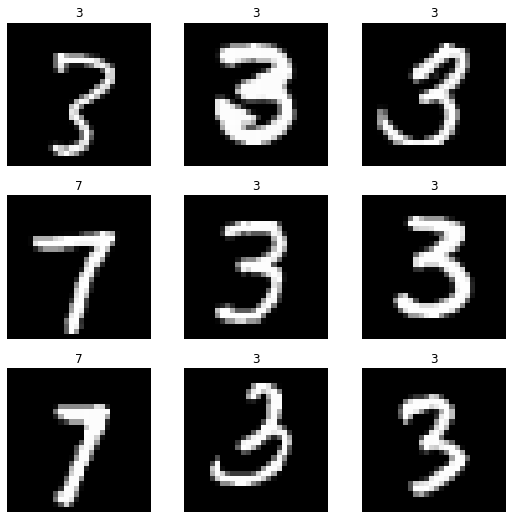

In [5]:
dls.show_batch()
# Use the resnet34 model from fastAI
learn = cnn_learner(dls, resnet34, cbs=[NeptuneCallback(run,"experiment"), SaveModelCallback()])

In [6]:
# Train the model for 100 epochs
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,time
0,1.269297,1.309042,00:14
1,1.192147,0.889242,00:14
2,1.084597,0.600647,00:14
3,0.976328,0.448656,00:14
4,0.884402,0.402255,00:14
5,0.805678,0.342425,00:14
6,0.716030,0.279185,00:14
7,0.631132,0.281024,00:14
8,0.557747,0.278431,00:14
9,0.496476,0.269649,00:16


Better model found at epoch 0 with valid_loss value: 1.3090424537658691.
Better model found at epoch 1 with valid_loss value: 0.8892423510551453.
Better model found at epoch 2 with valid_loss value: 0.6006466746330261.
Better model found at epoch 3 with valid_loss value: 0.4486559331417084.
Better model found at epoch 4 with valid_loss value: 0.402255117893219.
Better model found at epoch 5 with valid_loss value: 0.34242507815361023.
Better model found at epoch 6 with valid_loss value: 0.2791852355003357.
Better model found at epoch 8 with valid_loss value: 0.2784309685230255.
Better model found at epoch 9 with valid_loss value: 0.2696494162082672.
Better model found at epoch 10 with valid_loss value: 0.24379023909568787.
Better model found at epoch 11 with valid_loss value: 0.2250792682170868.
Better model found at epoch 12 with valid_loss value: 0.21009545028209686.
Better model found at epoch 14 with valid_loss value: 0.18888649344444275.
Better model found at epoch 15 with valid_lo

In [7]:
# Stop logging
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 30 operations to synchronize with Neptune. Do not kill this process.


All 30 operations synced, thanks for waiting!
